1. Create a new score variable from the weighted averages of the all score variables in the datasets. Notice that the number of students in the fourth grade isn't the same with the number of students in the eighth grade. So, you should weight the scores appropriately.

2. What are the correlations between this newly created score variable and the expenditure types? Which one of the expenditure type is more correlated than the others?

3. Now, apply PCA to the four expenditure types. How much of the total variance is explained by the first component?

4. What is the correlation between the overall score variable and the first principal component?

5. If you were to choose the best variables for your model, would you prefer using the first principal component instead of the expenditure variables? Why?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [79]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [80]:
education_df.dropna(inplace=True)
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,12520.0,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [0]:
#1. Create a new score variable from the weighted averages of the all score variables in the datasets. Notice that the number of students in the fourth grade isn't the same with the number of students in the eighth grade. So, you should weight the scores appropriately!.
education_df["overall_score"] = (education_df["GRADES_4_G"]*(education_df["AVG_MATH_4_SCORE"] + education_df["AVG_READING_4_SCORE"]) + 
                                 education_df["GRADES_8_G"]*(education_df["AVG_MATH_8_SCORE"] + education_df["AVG_READING_8_SCORE"]))/(education_df["GRADES_4_G"] + education_df["GRADES_8_G"])

We weighted the score variables using the number of students in the respective grades.

In [82]:
#2. What are the correlations between this newly created score variable and the expenditure types? Which one of the expenditure type is more correlated than the others?
education_df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()


,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.086797,0.100311,0.092225,0.015186,0.001657
TOTAL_EXPENDITURE,0.086797,1.000000,0.989849,0.993285,0.941120,0.928628
INSTRUCTION_EXPENDITURE,0.100311,0.989849,1.000000,0.974872,0.898766,0.885351
SUPPORT_SERVICES_EXPENDITURE,0.092225,0.993285,0.974872,1.000000,0.948014,0.915436
OTHER_EXPENDITURE,0.015186,0.941120,0.898766,0.948014,1.000000,0.921652
CAPITAL_OUTLAY_EXPENDITURE,0.001657,0.928628,0.885351,0.915436,0.921652,1.000000


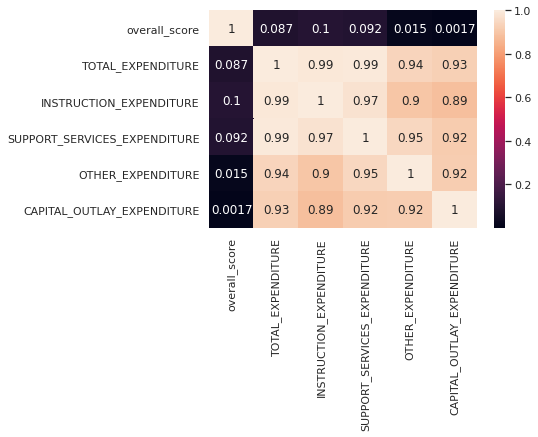

In [83]:
sns.heatmap(education_df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr(),annot=True)

The most correlated variable with the overall score is the instruction expenditure

In [89]:
#3. Now, apply PCA to the four expenditure types. How much of the total variance is explained by the first component?
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

x = StandardScaler().fit_transform(x)

sklearn_pca = PCA(n_components=1)
education_df["PCA_1"] = sklearn_pca.fit_transform(x)

print('The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n',sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.94312987]



More than 94% of the total variance is explained by the first principal component.

In [96]:
#4. What is the correlation between the overall score variable and the first principal component?
education_df[["PCA_1", "overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,PCA_1,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
PCA_1,1.000000,0.054225,0.992014,0.967914,0.988354,0.970155,0.957924
overall_score,0.054225,1.000000,0.086797,0.100311,0.092225,0.015186,0.001657
TOTAL_EXPENDITURE,0.992014,0.086797,1.000000,0.989849,0.993285,0.941120,0.928628
INSTRUCTION_EXPENDITURE,0.967914,0.100311,0.989849,1.000000,0.974872,0.898766,0.885351
SUPPORT_SERVICES_EXPENDITURE,0.988354,0.092225,0.993285,0.974872,1.000000,0.948014,0.915436
OTHER_EXPENDITURE,0.970155,0.015186,0.941120,0.898766,0.948014,1.000000,0.921652
CAPITAL_OUTLAY_EXPENDITURE,0.957924,0.001657,0.928628,0.885351,0.915436,0.921652,1.000000


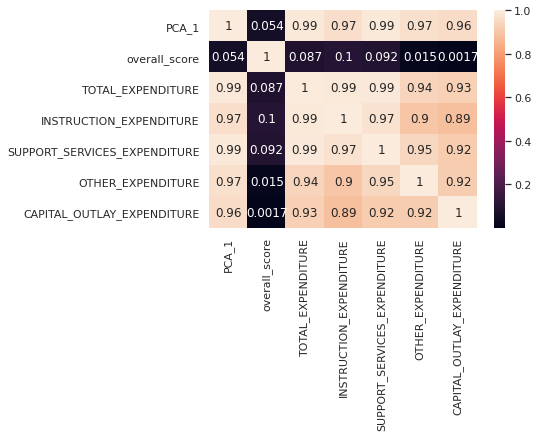

In [95]:
sns.heatmap(education_df[["PCA_1", "overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr(), annot=True)

he correlation of the first principal component is less than the instruction expenditure and the support service expenditure variables

In [0]:
#5. If you were to choose the best variables for your model, would you prefer using the first principal component instead of the expenditure variables? Why?

Instruction expenditure variable is more correlated with the overall score than the first principal component. Hence using instruction expenditure makes more sense. PCA works best when the correlation between the variables are less than and equal to 0.8. In our case, all of the expenditure variables are highly correlated with each other. This may result in instable principal component estimations